In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
from pathlib import Path
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Function to extract features from audio files
def feature_extract(languages):
    base_dir = 'C:\\Users\\Rhea Dmello\\Downloads\\Indian_languages_audio_dataset\\Indian_Languages_Audio_Dataset'
    features = []
    labels = []

    for language in languages:
        language_dir = os.path.join(base_dir, language)
        audio_files = glob(os.path.join(language_dir, '*.mp3'))

        for audio_file in audio_files:
            try:
                audio, sample_rate = librosa.load(audio_file)
                mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                mfccs_mean = np.mean(mfccs, axis=1)
                features.append(mfccs_mean)
                labels.append(language)
            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

    return np.array(features), np.array(labels)



In [ ]:
# Extract features and labels

languages = os.listdir(base_dir)
X, y = feature_extract(languages)

# Encode labels
lb = LabelEncoder()
y = lb.fit_transform(y)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Rhea Dmello\\Downloads\\Indian_languages_audio_dataset\\Indian_Languages_Audio_Dataset'

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train SVM model
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7966666666666666


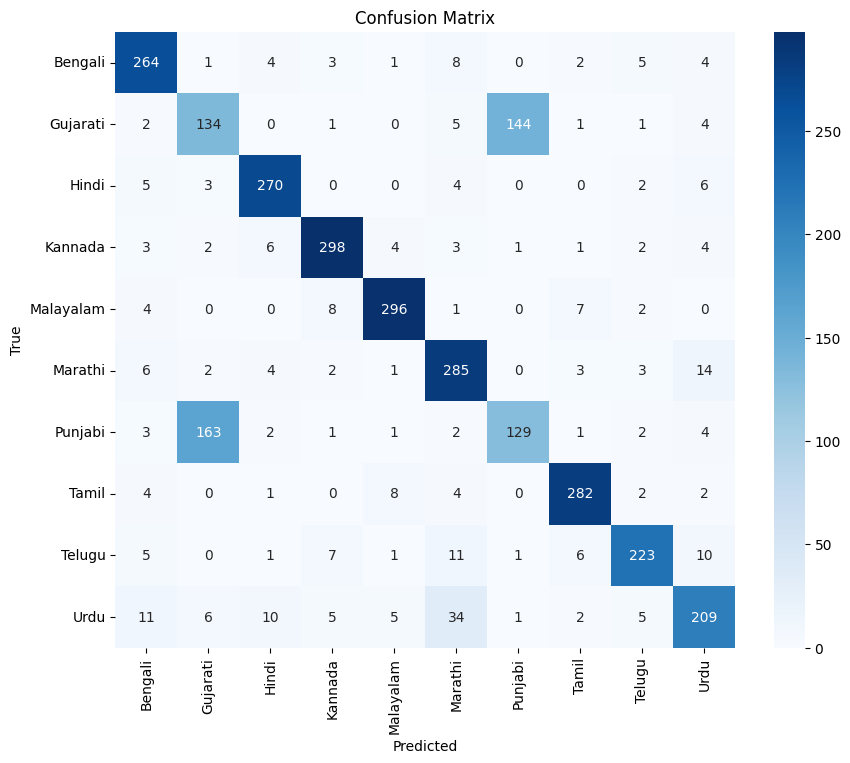

In [ ]:
# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0]
}

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load example dataset (replace with your dataset loading code)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define initial parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV with initial parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from initial search
print("Best Parameters found in initial search:")
print(grid_search.best_params_)
print("Best Accuracy Score found in initial search:", grid_search.best_score_)

# Further refinement based on initial results
best_params = grid_search.best_params_




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters found in initial search:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score found in initial search: 0.9583333333333334


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [2]:
# Example of further parameter refinements
refined_param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_depth': [best_params['max_depth'],
                  best_params['max_depth'] + 10 if best_params['max_depth'] is not None else None, # Handle the case when max_depth is None
                  None],
    'min_samples_split': [best_params['min_samples_split'], best_params['min_samples_split'] + 2],
    'min_samples_leaf': [best_params['min_samples_leaf'], best_params['min_samples_leaf'] + 1],
    'max_features': ['auto', 'sqrt']
}

# Perform GridSearchCV with refined parameters
rf_refined = RandomForestClassifier(random_state=42)
grid_search_refined = GridSearchCV(estimator=rf_refined, param_grid=refined_param_grid, cv=5, scoring='accuracy')
grid_search_refined.fit(X_train, y_train)

# Print the best parameters and best score from refined search
print("\nBest Parameters found in refined search:")
print(grid_search_refined.best_params_)
print("Best Accuracy Score found in refined search:", grid_search_refined.best_score_)

# Evaluate final model on validation set
best_rf_model = grid_search_refined.best_estimator_
y_pred = best_rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\nAccuracy on validation set with best model:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


Best Parameters found in refined search:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy Score found in refined search: 0.9583333333333334

Accuracy on validation set with best model: 1.0
